# Advanced Regression Assignment
## Step1 : Cleaning the Data

In [3]:
#Import Necessary Libraries and importing the Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [5]:
df = pd.read_csv(r"C:\Users\Parmesh Kademani\Downloads\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Info and Describe to check the model

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.shape

(1460, 81)

In [8]:
# Checking the number of columns with Null/NA values sorted.

null = round(100 * df.isnull().sum()/len(df))
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          100.0
MiscFeature      96.0
Alley            94.0
Fence            81.0
FireplaceQu      47.0
LotFrontage      18.0
GarageYrBlt       6.0
GarageType        6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
BsmtFinType1      3.0
BsmtExposure      3.0
BsmtCond          3.0
BsmtQual          3.0
BsmtFinType2      3.0
MasVnrArea        1.0
MasVnrType        1.0
dtype: float64

In [9]:
# drop columns with null greater than 85%. Also, we will drop Id as its not necessary

df = df.drop(['Alley', 'PoolQC', 'MiscFeature', 'Id'], axis=1)
df.shape

(1460, 77)

In [10]:
null = round(100 * df.isnull().sum()/len(df))
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

Fence           81.0
FireplaceQu     47.0
LotFrontage     18.0
GarageCond       6.0
GarageQual       6.0
GarageFinish     6.0
GarageYrBlt      6.0
GarageType       6.0
BsmtFinType2     3.0
BsmtFinType1     3.0
BsmtExposure     3.0
BsmtCond         3.0
BsmtQual         3.0
MasVnrArea       1.0
MasVnrType       1.0
dtype: float64

In [11]:
# We need to impute the other columns. Since we know Null/NA values in column are due to the feature not being available
# we will first convert the Null/NA values to None values. Then depending on the spread/variance of data we will decide if need
# to drop the columns or not.

val = ['Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']
for i in val:
    df[i].fillna('None', inplace=True)

In [12]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
# In the above step we have only imputed categorical valriables with Null/NA to None. Now we will impute numerical variables.
# For numerical variables, since the columns look promising, we will impute them with median value of the column

val = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for i in val:
    df[i].fillna(df[i].median(),inplace=True)

In [14]:
df.LotFrontage.describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [15]:
#Finally no columns has null/NA values. We can move to next step

null = round(100 * df.isnull().sum()/len(df))
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

Series([], dtype: float64)

In [16]:
round(100 * df.isnull().sum()/len(df))

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

## Step 2 : Exploratory Data Analysis


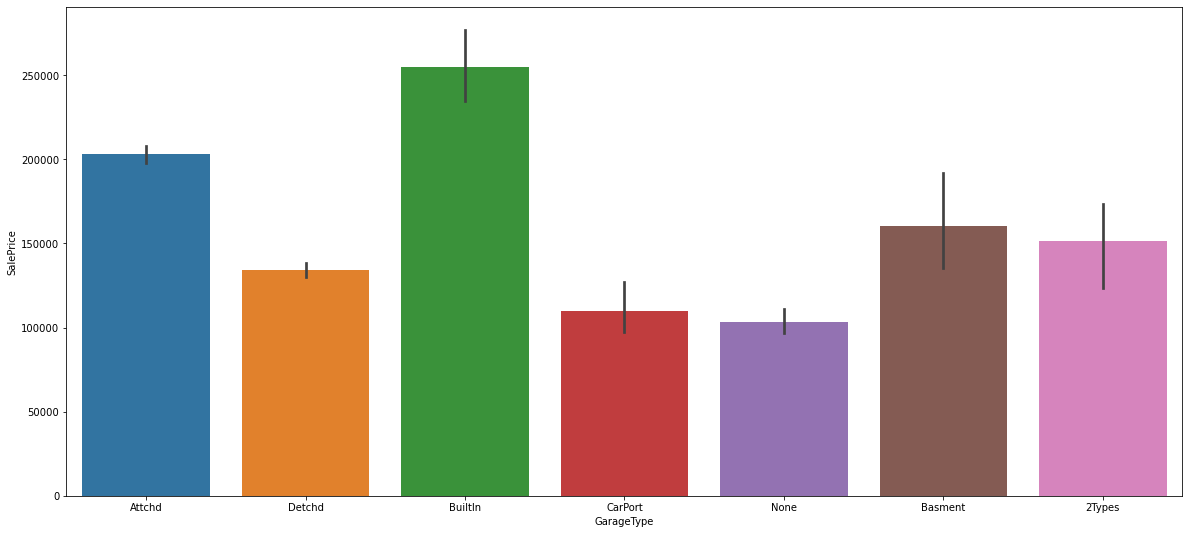

In [18]:
# BarGraph to see how the Target Variable Saleprice is chaanging to different values of predictor variables

plt.figure(figsize=(20,9))
sns.barplot(data = df, x='GarageType', y='SalePrice')
plt.show()

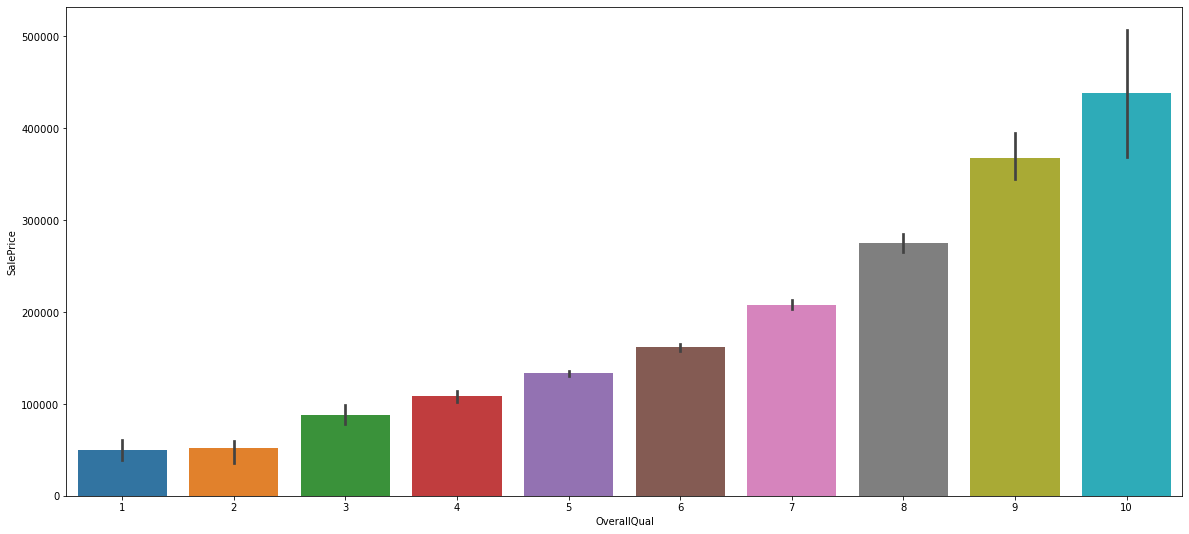

In [19]:
plt.figure(figsize=(20,9))
sns.barplot(data = df, x='OverallQual', y='SalePrice')
plt.show()

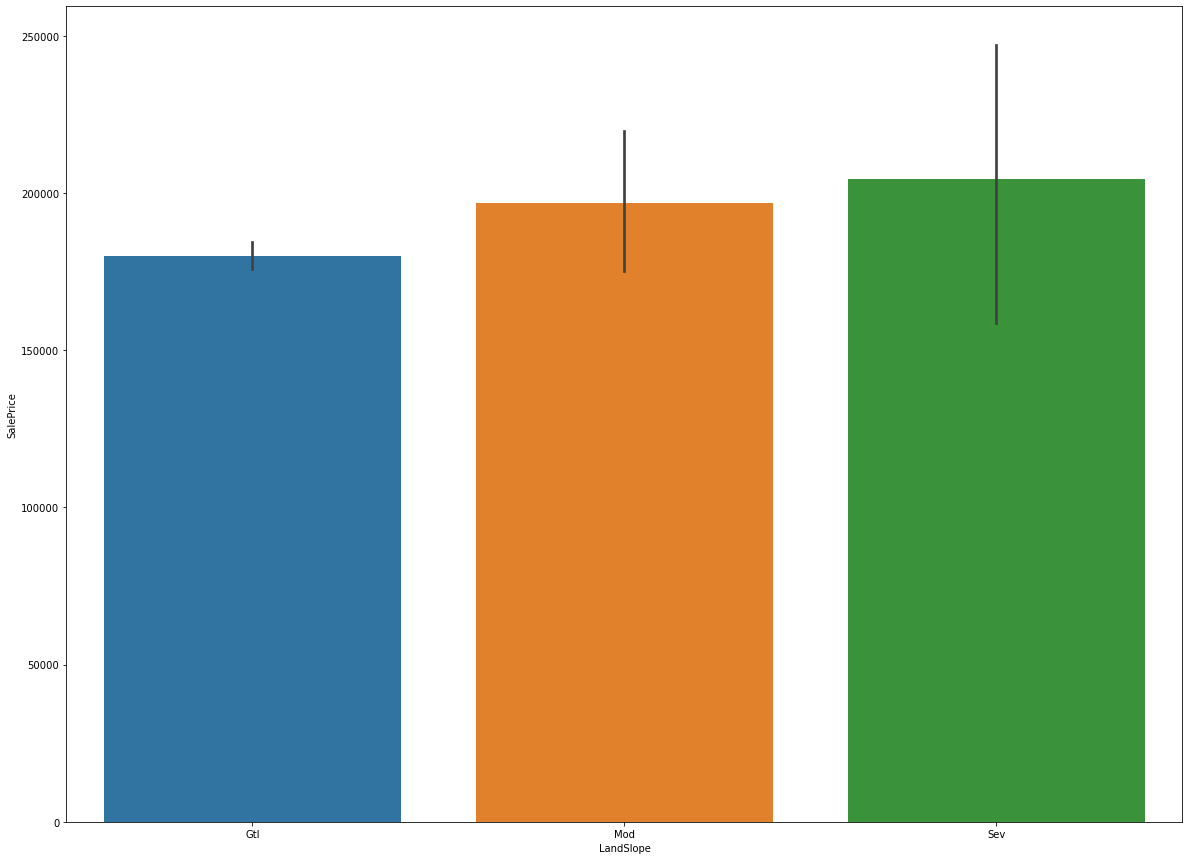

In [20]:
plt.figure(figsize=(20,15))
sns.barplot(data = df, x='LandSlope',y='SalePrice')
plt.show()

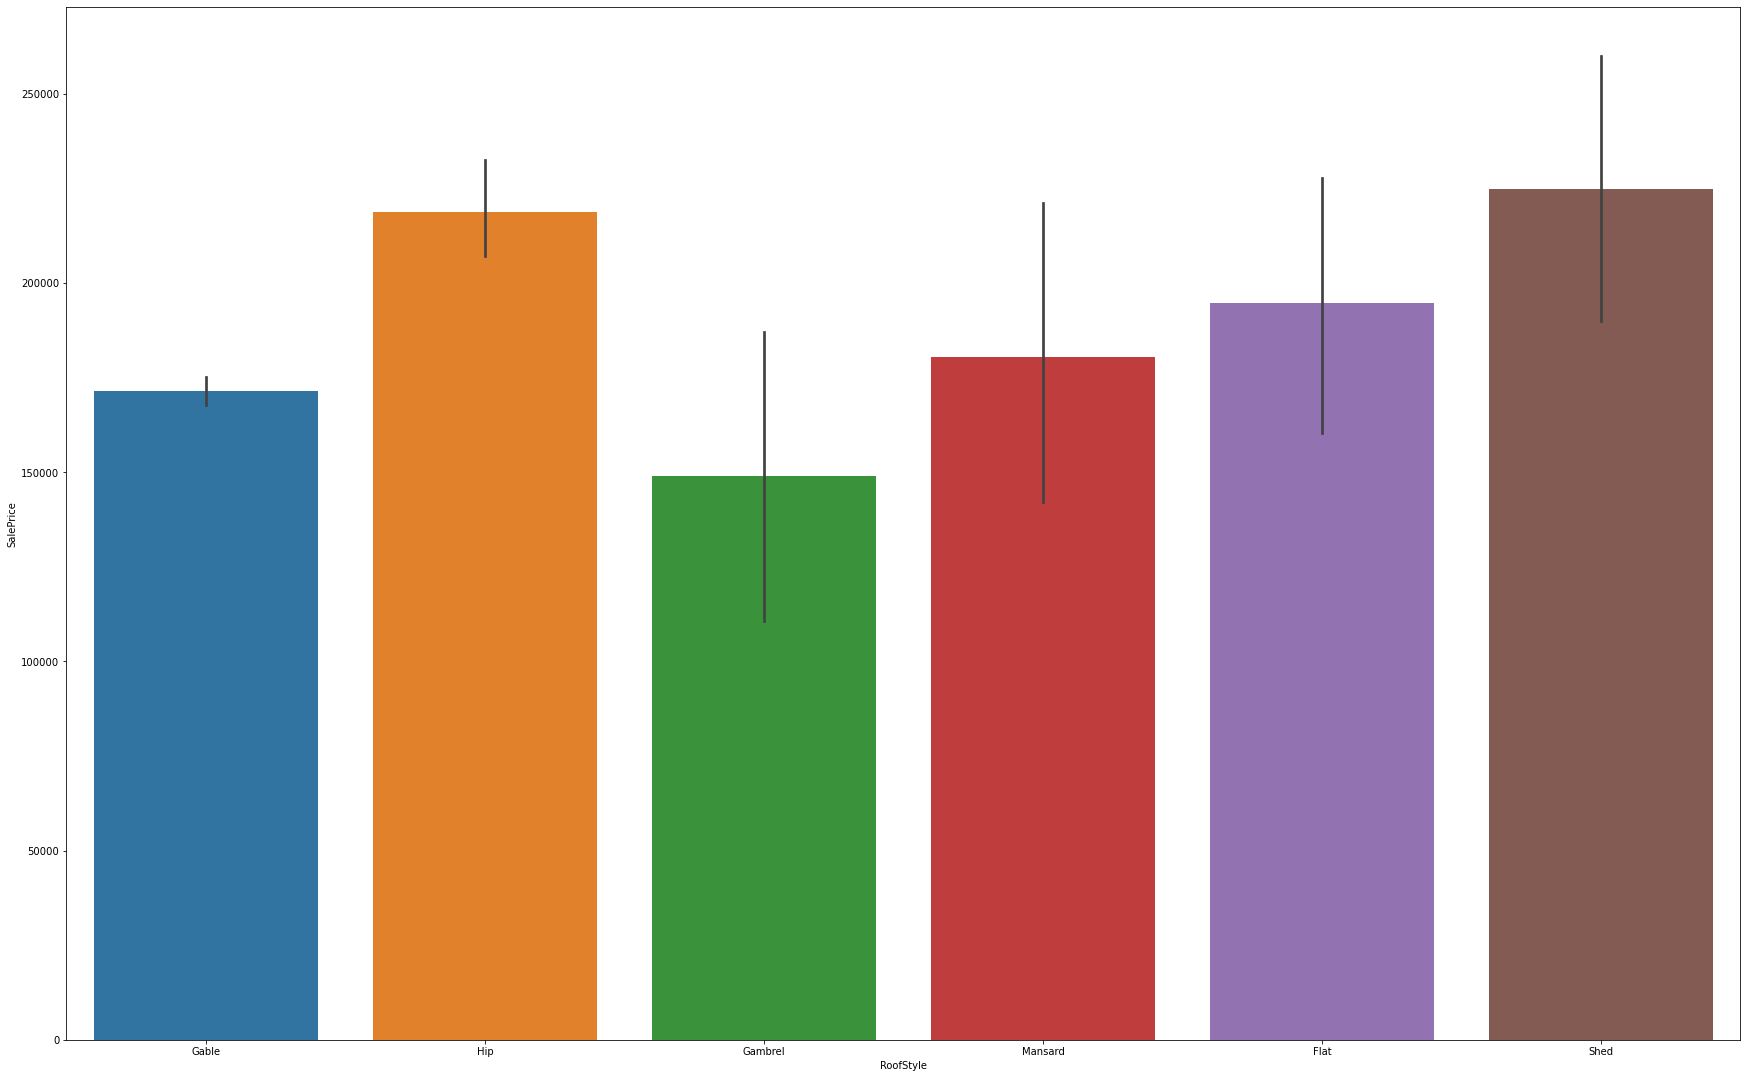

In [21]:
plt.figure(figsize=(30,19))
sns.barplot(data = df, x='RoofStyle',y='SalePrice')
plt.show()


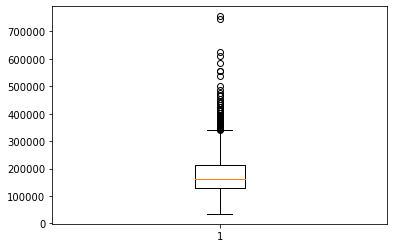

In [22]:
# Boxplot to check Spread of the column
plt.boxplot(x=df['SalePrice'])
plt.show()

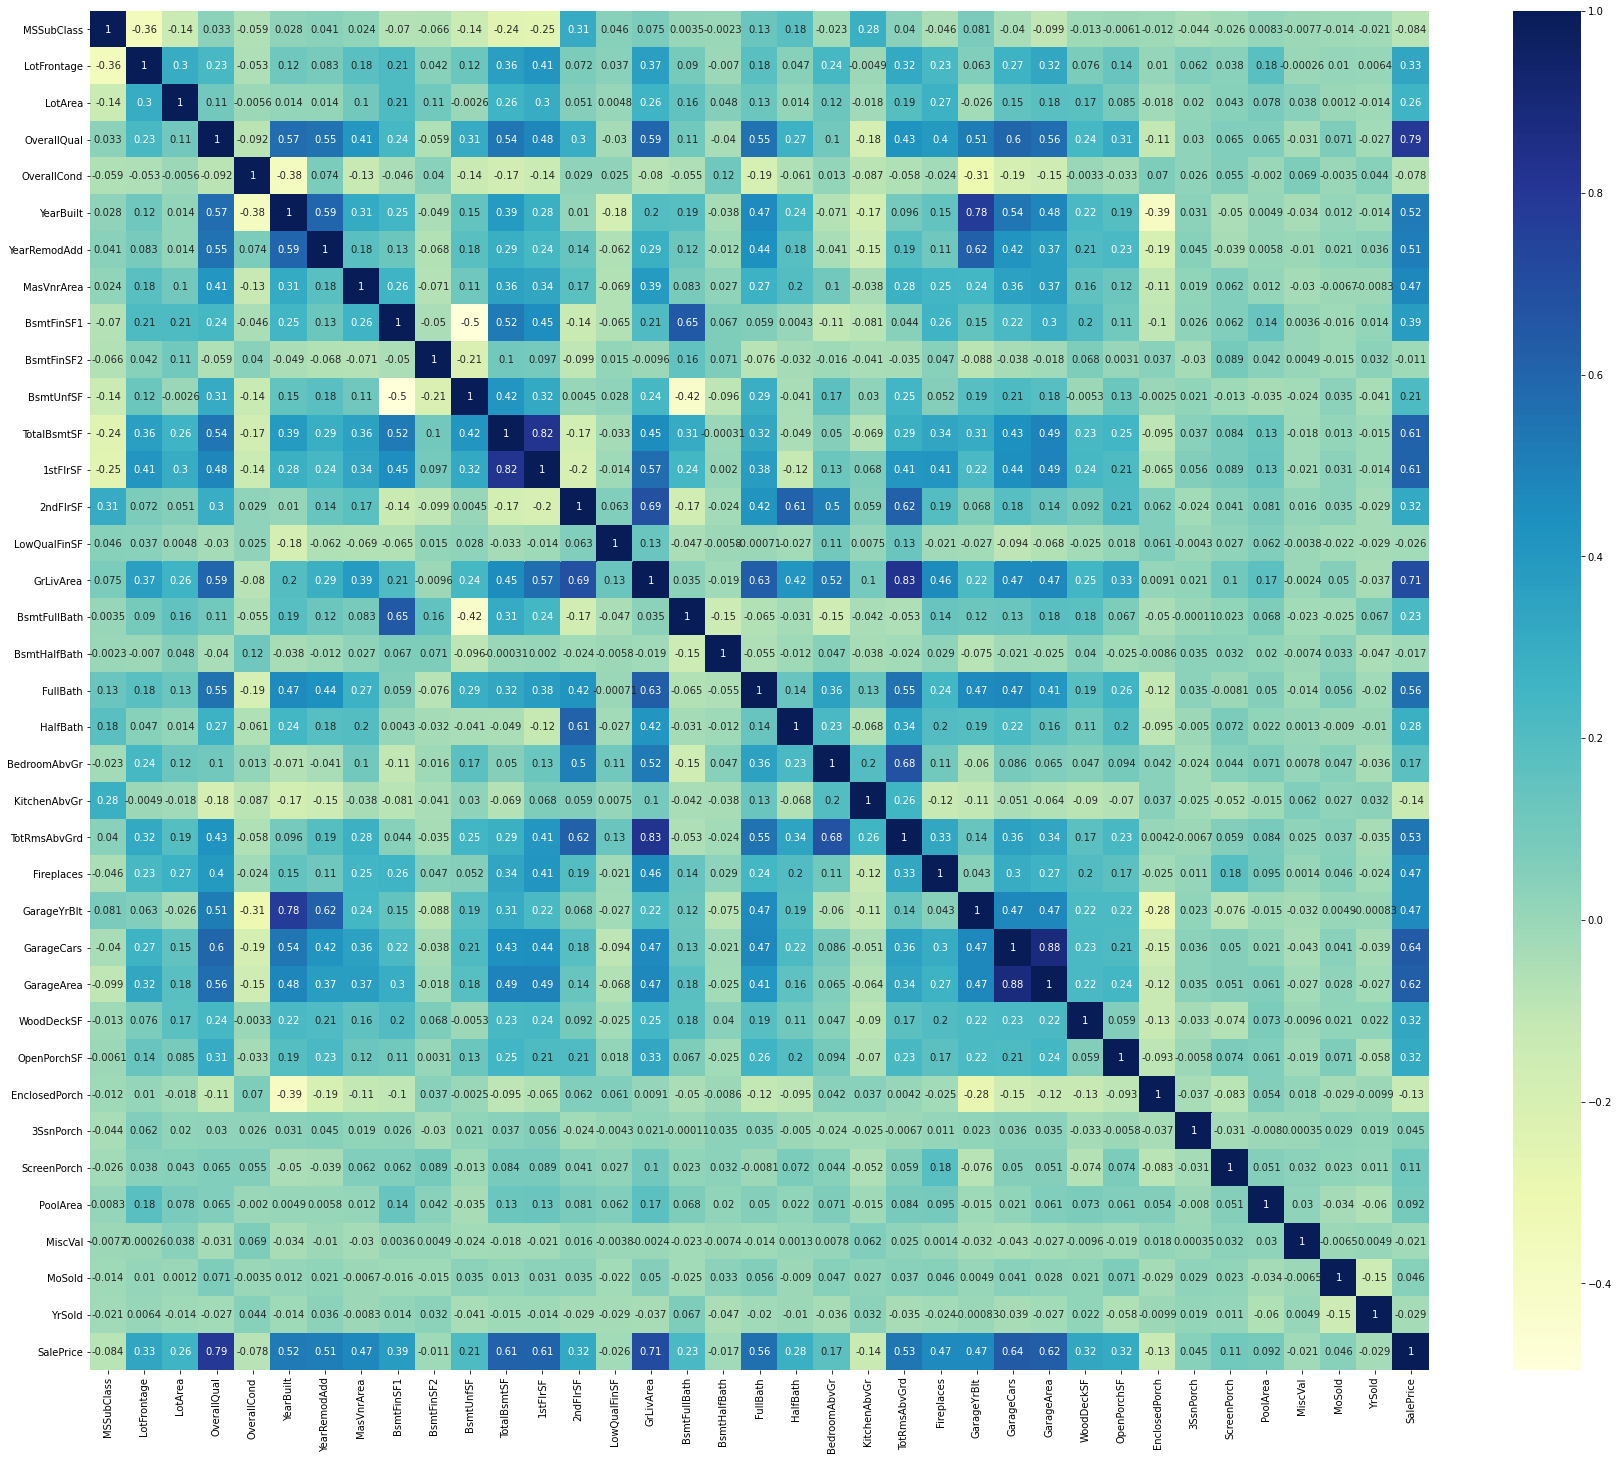

In [23]:
# Heatmap to check the Correlation of predictor variables with target variables

plt.figure(figsize=(30, 25))
sns.heatmap(data = df.corr(), cmap='YlGnBu', annot=True)
plt.show()

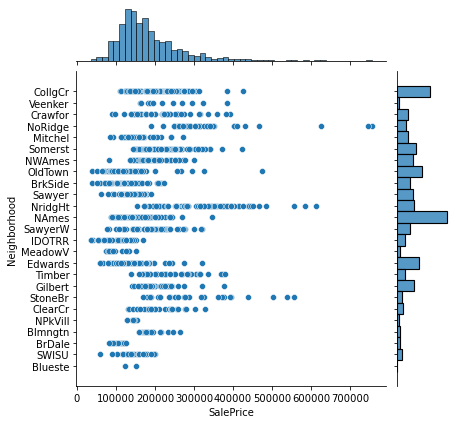

In [24]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df,x='SalePrice',y='Neighborhood')
plt.show()

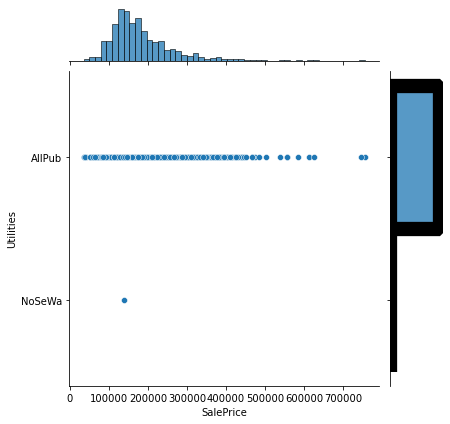

In [25]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df,x='SalePrice',y='Utilities')
plt.show()

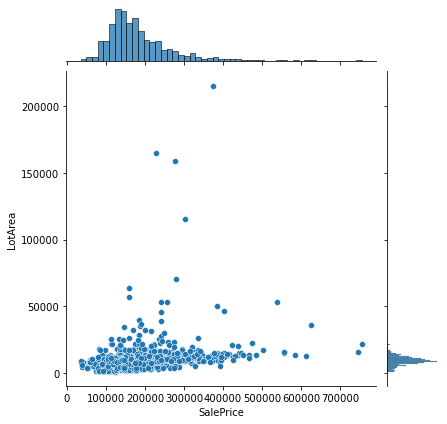

In [26]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df, x='SalePrice', y='LotArea')
plt.show()

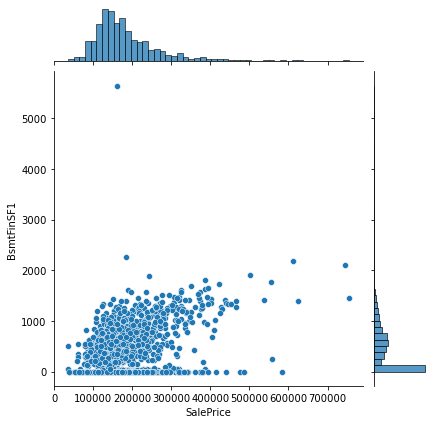

In [27]:
# Joint plot to check the Spread of the a predictor column with target column

sns.jointplot(data=df, x='SalePrice', y='BsmtFinSF1')
plt.show()

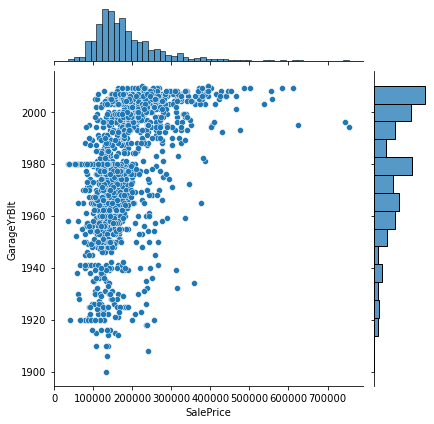

In [28]:
# Joint plot to check the Spread of the a predictor column with target column
sns.jointplot(data=df,x='SalePrice',y='GarageYrBlt')
plt.show()

In [29]:
# Deriving another column called 'PropertyAge' using YrSold and YearBuilt

df['PropertyAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,250000,8


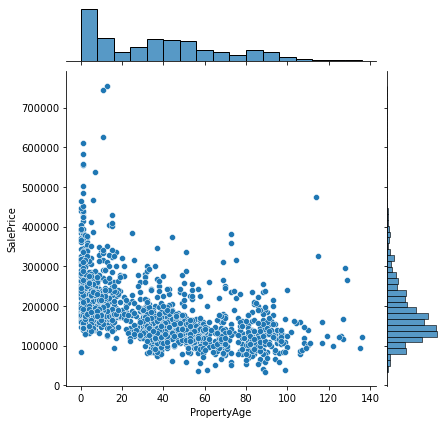

In [30]:
sns.jointplot(data=df, x='PropertyAge', y='SalePrice')
plt.show()

In [31]:
# Dropping Redundant and Unimportant Variables

df = df.drop(['YrSold','MoSold', 'YearBuilt','YearRemodAdd','GarageYrBlt'], axis=1)

In [32]:
# Checking for Variance of the Variables. Any variable which doesnt have much variance can be dropped.

val = ['BsmtFinSF2','LowQualFinSF','Street','Utilities','Condition2','RoofMatl','Heating','GarageQual','GarageCond','3SsnPorch','ScreenPorch','PoolArea','EnclosedPorch','MiscVal']
for i in val:
    print(df[i].value_counts())

0       1293
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
258        1
230        1
232        1
239        1
240        1
264        1
273        1
276        1
306        1
311        1
324        1
334        1
181        1
1085       1
1120       1
125        1
28         1
32         1
35         1
40         1
68         1
80         1
81         1
105        1
106        1
108        1
110        1
119        1
121        1
123        1
127        1
177        1
128        1
132        1
139        1
144        1
149        1
150        1
163        1
165        1
168        1
169        1
173        1
174        1
344        1
175        1
336        1

In [33]:
#Dropping those variables which are having Low variance as seen above

df = df.drop(val, axis=1)

In [34]:
df.shape

(1460, 59)

## Step 3 : Model Building

In [35]:
# We need to Binary Encode the Numerical variables which are not continuous to create dummy variables. Columns OverallQual
# OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars
# have been Binary Encoded.

df[['OverallQual']] = df[['OverallQual']].apply(lambda x: x.map({1:'Rating1', 2:'Rating2', 3:'Rating3', 4:'Rating4', 5:'Rating5', 6:'Rating6', 7:'Rating7', 8:'Rating8', 9:'Rating9', 10:'Rating10'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [36]:
df[['OverallCond']] = df[['OverallCond']].apply(lambda x: x.map({1:'Rating1', 2:'Rating2', 3:'Rating3', 4:'Rating4', 5:'Rating5', 6:'Rating6', 7:'Rating7', 8:'Rating8', 9:'Rating9', 10:'Rating10'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [37]:
df[['BsmtFullBath']] = df[['BsmtFullBath']].apply(lambda x: x.map({0:'No Bath',1:'One Bath',2:'Two Bath',3:'Three Bath'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [38]:
df[['BsmtHalfBath']] = df[['BsmtHalfBath']].apply(lambda x: x.map({0:'No Bath',1:'One Bath',2:'Two Bath'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,No Bath,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,One Bath,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,No Bath,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,No Bath,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,No Bath,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [39]:
df[['FullBath']] = df[['FullBath']].apply(lambda x: x.map({0:'No Bath',1:'One Bath',2:'Two Bath',3:'Three Bath'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,No Bath,Two Bath,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,One Bath,Two Bath,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,No Bath,Two Bath,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,No Bath,One Bath,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,No Bath,Two Bath,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [40]:
df[['HalfBath']] = df[['HalfBath']].apply(lambda x: x.map({0:'No Bath',1:'One Bath',2:'Two Bath'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,No Bath,Two Bath,One Bath,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,One Bath,Two Bath,No Bath,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,No Bath,Two Bath,One Bath,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,No Bath,One Bath,No Bath,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,No Bath,Two Bath,One Bath,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [41]:
df[['BedroomAbvGr']] = df[['BedroomAbvGr']].apply(lambda x: x.map({0:'No Bedroom',1:'One Bedroom',2:'Two Bedroom',3:'Three Bedroom',4:'Four Bedroom',5:'Five Bedroom',6:'Six Bedroom',8:'Eight Bedroom'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,One Bath,Two Bath,No Bath,Three Bedroom,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,No Bath,One Bath,No Bath,Three Bedroom,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,No Bath,Two Bath,One Bath,Four Bedroom,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [42]:
df[['KitchenAbvGr']] = df[['KitchenAbvGr']].apply(lambda x: x.map({0:'No Kitchen',1:'One Kitchen',2:'Two Kitchen',3:'Three Kitchen'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,One Kitchen,Gd,8,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,One Bath,Two Bath,No Bath,Three Bedroom,One Kitchen,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,One Kitchen,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,No Bath,One Bath,No Bath,Three Bedroom,One Kitchen,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,No Bath,Two Bath,One Bath,Four Bedroom,One Kitchen,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [43]:
df[['TotRmsAbvGrd']] = df[['TotRmsAbvGrd']].apply(lambda x: x.map({0:'No Room',1:'One Room',2:'Two Room',3:'Three Room',4:'Four Room',5:'Five Room',6:'Six Room',7:'Seven Room',8:'Eight Room',9:'Nine Room',10:'Ten Room',11:'Eleven Room',12:'Twelve Room',13:'Thirteen Room',14:'Fourteen Room'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,One Kitchen,Gd,Eight Room,Typ,0,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,One Bath,Two Bath,No Bath,Three Bedroom,One Kitchen,TA,Six Room,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,One Kitchen,Gd,Six Room,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,No Bath,One Bath,No Bath,Three Bedroom,One Kitchen,Gd,Seven Room,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,No Bath,Two Bath,One Bath,Four Bedroom,One Kitchen,Gd,Nine Room,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [44]:
df[['Fireplaces']] = df[['Fireplaces']].apply(lambda x: x.map({0:'No Fireplace',1:'One Fireplace',2:'Two Fireplace',3:'Three Fireplace'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,One Kitchen,Gd,Eight Room,Typ,No Fireplace,None,Attchd,RFn,2,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,One Bath,Two Bath,No Bath,Three Bedroom,One Kitchen,TA,Six Room,Typ,One Fireplace,TA,Attchd,RFn,2,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,One Kitchen,Gd,Six Room,Typ,One Fireplace,TA,Attchd,RFn,2,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,No Bath,One Bath,No Bath,Three Bedroom,One Kitchen,Gd,Seven Room,Typ,One Fireplace,Gd,Detchd,Unf,3,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,No Bath,Two Bath,One Bath,Four Bedroom,One Kitchen,Gd,Nine Room,Typ,One Fireplace,TA,Attchd,RFn,3,836,Y,192,84,None,WD,Normal,250000,8


In [45]:
df[['GarageCars']] = df[['GarageCars']].apply(lambda x: x.map({0:'No Garage',1:'One Garage',2:'Two Garage',3:'Three Garage',4:'Four Garage'}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,One Kitchen,Gd,Eight Room,Typ,No Fireplace,None,Attchd,RFn,Two Garage,548,Y,0,61,None,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Rating6,Rating8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,No Bath,One Bath,Two Bath,No Bath,Three Bedroom,One Kitchen,TA,Six Room,Typ,One Fireplace,TA,Attchd,RFn,Two Garage,460,Y,298,0,None,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Rating7,Rating5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,One Bath,No Bath,Two Bath,One Bath,Three Bedroom,One Kitchen,Gd,Six Room,Typ,One Fireplace,TA,Attchd,RFn,Two Garage,608,Y,0,42,None,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Rating7,Rating5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,One Bath,No Bath,One Bath,No Bath,Three Bedroom,One Kitchen,Gd,Seven Room,Typ,One Fireplace,Gd,Detchd,Unf,Three Garage,642,Y,0,35,None,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Rating8,Rating5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,One Bath,No Bath,Two Bath,One Bath,Four Bedroom,One Kitchen,Gd,Nine Room,Typ,One Fireplace,TA,Attchd,RFn,Three Garage,836,Y,192,84,None,WD,Normal,250000,8


In [46]:
# Next, we will convert those variables which we have done Binary encoding and other variables to convert them into dummy variables

df = pd.get_dummies(df, drop_first=True)
df.head()


,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_One Bath,BsmtFullBath_Three Bath,BsmtFullBath_Two Bath,BsmtHalfBath_One Bath,BsmtHalfBath_Two Bath,FullBath_One Bath,FullBath_Three Bath,FullBath_Two Bath,HalfBath_One Bath,HalfBath_Two Bath,BedroomAbvGr_Five Bedroom,BedroomAbvGr_Four Bedroom,BedroomAbvGr_No Bedroom,BedroomAbvGr_One Bedroom,BedroomAbvGr_Six Bedroom,BedroomAbvGr_Three Bedroom,BedroomAbvGr_Two Bedroom,KitchenAbvGr_One Kitchen,KitchenAbvGr_Three Kitchen,KitchenAbvGr_Two Kitchen,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_Eleven Room,TotRmsAbvGrd_Five Room,TotRmsAbvGrd_Four Room,TotRmsAbvGrd_Fourteen Room,TotRmsAbvGrd_Nine Room,TotRmsAbvGrd_Seven Room,TotRmsAbvGrd_Six Room,TotRmsAbvGrd_Ten Room,TotRmsAbvGrd_Three Room,TotRmsAbvGrd_Twelve Room,TotRmsAbvGrd_Two Room,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_One Fireplace,Fireplaces_Three Fireplace,Fireplaces_Two Fireplace,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Car

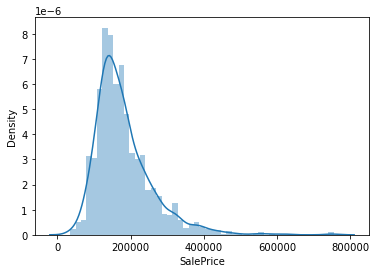

In [47]:
# Distplot to check the spread of Target Variable SalePrice

sns.distplot(df['SalePrice'])
plt.show()

In [48]:
# As we can see, the data is skewed to the left. To mitigate this, we will convert the target variable to another form like 
#log, exp etc.

# Here we will apply Log.
df['SalePrice'] = np.log1p(df['SalePrice'])
df.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_One Bath,BsmtFullBath_Three Bath,BsmtFullBath_Two Bath,BsmtHalfBath_One Bath,BsmtHalfBath_Two Bath,FullBath_One Bath,FullBath_Three Bath,FullBath_Two Bath,HalfBath_One Bath,HalfBath_Two Bath,BedroomAbvGr_Five Bedroom,BedroomAbvGr_Four Bedroom,BedroomAbvGr_No Bedroom,BedroomAbvGr_One Bedroom,BedroomAbvGr_Six Bedroom,BedroomAbvGr_Three Bedroom,BedroomAbvGr_Two Bedroom,KitchenAbvGr_One Kitchen,KitchenAbvGr_Three Kitchen,KitchenAbvGr_Two Kitchen,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_Eleven Room,TotRmsAbvGrd_Five Room,TotRmsAbvGrd_Four Room,TotRmsAbvGrd_Fourteen Room,TotRmsAbvGrd_Nine Room,TotRmsAbvGrd_Seven Room,TotRmsAbvGrd_Six Room,TotRmsAbvGrd_Ten Room,TotRmsAbvGrd_Three Room,TotRmsAbvGrd_Twelve Room,TotRmsAbvGrd_Two Room,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_One Fireplace,Fireplaces_Three Fireplace,Fireplaces_Two Fireplace,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Car

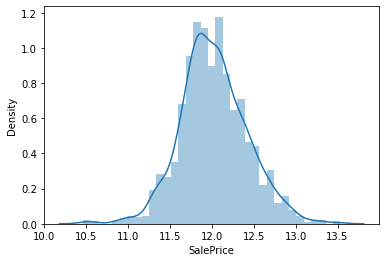

In [50]:
# As we can see, once the log is applies, the target vaariable is no longer skewed.

sns.distplot(df['SalePrice'])
plt.show()

In [51]:
# We will use MinMaxScaler to scale the data.

var_list = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice','PropertyAge']
scaler = MinMaxScaler()
df[var_list] = scaler.fit_transform(df[var_list])
df.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_One Bath,BsmtFullBath_Three Bath,BsmtFullBath_Two Bath,BsmtHalfBath_One Bath,BsmtHalfBath_Two Bath,FullBath_One Bath,FullBath_Three Bath,FullBath_Two Bath,HalfBath_One Bath,HalfBath_Two Bath,BedroomAbvGr_Five Bedroom,BedroomAbvGr_Four Bedroom,BedroomAbvGr_No Bedroom,BedroomAbvGr_One Bedroom,BedroomAbvGr_Six Bedroom,BedroomAbvGr_Three Bedroom,BedroomAbvGr_Two Bedroom,KitchenAbvGr_One Kitchen,KitchenAbvGr_Three Kitchen,KitchenAbvGr_Two Kitchen,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_Eleven Room,TotRmsAbvGrd_Five Room,TotRmsAbvGrd_Four Room,TotRmsAbvGrd_Fourteen Room,TotRmsAbvGrd_Nine Room,TotRmsAbvGrd_Seven Room,TotRmsAbvGrd_Six Room,TotRmsAbvGrd_Ten Room,TotRmsAbvGrd_Three Room,TotRmsAbvGrd_Twelve Room,TotRmsAbvGrd_Two Room,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_One Fireplace,Fireplaces_Three Fireplace,Fireplaces_Two Fireplace,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Car

In [52]:
df.shape

(1460, 253)

In [53]:
# We get X and y values from df to build the model.

X = df.drop('SalePrice', axis=1)
X.head()


,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_One Bath,BsmtFullBath_Three Bath,BsmtFullBath_Two Bath,BsmtHalfBath_One Bath,BsmtHalfBath_Two Bath,FullBath_One Bath,FullBath_Three Bath,FullBath_Two Bath,HalfBath_One Bath,HalfBath_Two Bath,BedroomAbvGr_Five Bedroom,BedroomAbvGr_Four Bedroom,BedroomAbvGr_No Bedroom,BedroomAbvGr_One Bedroom,BedroomAbvGr_Six Bedroom,BedroomAbvGr_Three Bedroom,BedroomAbvGr_Two Bedroom,KitchenAbvGr_One Kitchen,KitchenAbvGr_Three Kitchen,KitchenAbvGr_Two Kitchen,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_Eleven Room,TotRmsAbvGrd_Five Room,TotRmsAbvGrd_Four Room,TotRmsAbvGrd_Fourteen Room,TotRmsAbvGrd_Nine Room,TotRmsAbvGrd_Seven Room,TotRmsAbvGrd_Six Room,TotRmsAbvGrd_Ten Room,TotRmsAbvGrd_Three Room,TotRmsAbvGrd_Twelve Room,TotRmsAbvGrd_Two Room,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_One Fireplace,Fireplaces_Three Fireplace,Fireplaces_Two Fireplace,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,Garag

In [54]:
y = df['SalePrice']
y.head()

0    0.581428
1    0.536316
2    0.604026
3    0.451868
4    0.640475
Name: SalePrice, dtype: float64

In [55]:
# Using Train test split func to split the df data into 70-30.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=100)
print(df.shape)

(1460, 253)


In [56]:
X_train.shape

(1021, 252)

In [57]:
X_test.shape

(439, 252)

In [58]:
# Building and fitting Linear Regression model to X and y.

lr = LinearRegression()

In [59]:
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
# We will optionally build a Normal Linear Regression Model using RFE 
# Building RFE with n=80 values and fitting the data with training data. 

rfe = RFE(lr, n_features_to_select=60)

In [62]:
rfe = rfe.fit(X_train, y_train)


In [63]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('MSSubClass', False, 12),
 ('LotFrontage', False, 156),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 137),
 ('BsmtFinSF1', False, 72),
 ('BsmtUnfSF', False, 87),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 114),
 ('2ndFlrSF', False, 93),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 105),
 ('WoodDeckSF', False, 15),
 ('OpenPorchSF', False, 186),
 ('PropertyAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 116),
 ('LotShape_IR3', False, 165),
 ('LotShape_Reg', False, 189),
 ('LandContour_HLS', False, 84),
 ('LandContour_Low', False, 77),
 ('LandContour_Lvl', False, 78),
 ('LotConfig_CulDSac', False, 86),
 ('LotConfig_FR2', False, 89),
 ('LotConfig_FR3', False, 134),
 ('LotConfig_Inside', False, 185),
 ('LandSlope_Mod', False, 98),
 ('LandSlope_Sev', False, 158),
 ('Neighborhood_Blueste', False, 167),
 ('Neighborhood_BrDale', False, 172),
 ('Neighborhood_BrkSide', False, 67),
 ('Ne

In [64]:
# All variables/columns which were not selected by RFE

val = X_train.columns[~rfe.support_]

In [65]:
# All variables/columns which were selected by RFE

X_train.columns[rfe.support_]

Index(['LotArea', 'TotalBsmtSF', 'GrLivArea', 'PropertyAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'OverallQual_Rating10', 'OverallQual_Rating2', 'OverallQual_Rating3', 'OverallQual_Rating4', 'OverallQual_Rating5', 'OverallQual_Rating6', 'OverallQual_Rating7', 'OverallQual_Rating8', 'OverallQual_Rating9', 'OverallCond_Rating2', 'OverallCond_Rating3', 'OverallCond_Rating4', 'OverallCond_Rating5', 'OverallCond_Rating6', 'OverallCond_Rating7', 'OverallCond_Rating8', 'OverallCond_Rating9', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'ExterCond_Po', 'BsmtQual_None', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtFinType1_None', 'BsmtFullBath_Three Bath', 'BedroomAbvGr_Five Bedroom', 'BedroomAbvGr_Four Bedroom', 'BedroomAbvGr_No Bedroom', 'BedroomAbvGr_One Bedroom', 'BedroomAbvGr_Six Bedroom', 'BedroomAbvGr_Three Bedroom', 'BedroomAbvGr_Two Bedroom', 'KitchenAbvGr_One Kitchen',
       'K

In [66]:
# Building Normal Linear Regression Model

var_list = X_train.columns[rfe.support_]
X_train_lm = X_train[var_list]
X_train_lm_sm = sm.add_constant(X_train_lm)
X_train_lm_sm.head()

,const,LotArea,TotalBsmtSF,GrLivArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_Crawfor,OverallQual_Rating10,OverallQual_Rating2,OverallQual_Rating3,OverallQual_Rating4,OverallQual_Rating5,OverallQual_Rating6,OverallQual_Rating7,OverallQual_Rating8,OverallQual_Rating9,OverallCond_Rating2,OverallCond_Rating3,OverallCond_Rating4,OverallCond_Rating5,OverallCond_Rating6,OverallCond_Rating7,OverallCond_Rating8,OverallCond_Rating9,Exterior1st_AsphShn,Exterior1st_CBlock,Exterior2nd_AsphShn,Exterior2nd_CBlock,ExterCond_Po,BsmtQual_None,BsmtCond_None,BsmtCond_Po,BsmtFinType1_None,BsmtFullBath_Three Bath,BedroomAbvGr_Five Bedroom,BedroomAbvGr_Four Bedroom,BedroomAbvGr_No Bedroom,BedroomAbvGr_One Bedroom,BedroomAbvGr_Six Bedroom,BedroomAbvGr_Three Bedroom,BedroomAbvGr_Two Bedroom,KitchenAbvGr_One Kitchen,KitchenAbvGr_Three Kitchen,KitchenAbvGr_Two Kitchen,TotRmsAbvGrd_Eleven Room,TotRmsAbvGrd_Fourteen Room,TotRmsAbvGrd_Twelve Room,Functional_Sev,Fireplaces_One Fireplace,Fireplaces_Three Fireplace,Fireplaces_Two Fireplace,FireplaceQu_None,GarageType_None,GarageFinish_None,GarageCars_No Garage,SaleType_Con,SaleType_ConLD
318,1.0,0.040197,0.220458,0.435569,0.117647,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
239,1.0,0.034780,0.120295,0.217219,0.477941,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
986,1.0,0.018743,0.079378,0.245102,0.705882,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1416,1.0,0.046928,0.127169,0.368500,0.919118,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
390,1.0,0.033209,0.140917,0.194612,0.794118,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [67]:
#Summary of Normal Regression Model.

lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     147.5
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:11:58   Log-Likelihood:                 1722.1
No. Observations:                1021   AIC:                            -3346.
Df Residuals:                     972   BIC:                            -3105.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1350      0.017      8.144      0.000       0.102       0.167
LotArea                        0.1347      0.034      3.954      0.000       0.068       0.202
TotalBsmtSF                    0.2027      0.031      6.624      0.000       0.143       0.263
GrLivArea                      0.4728      0.029     16.443      0.000       0.416       0.529
PropertyAge                   -0.1689      0.011    -15.319      0.000      -0.191      -0.147
MSZoning_FV                    0.1369      0.020      6.685      0.000       0.097       0.177
MSZoning_RH                    0.1295      0.023      5.576      0.000       0.084       0.175
MSZoning_RL                    0.1275      0.019      6.668      0.000       0.090       0.165
MSZoning_RM                    0.0968      0.019      5.038      0.000       0.059       0.135
Neighborhood_ClearCr           0.0505      0.011      4.566      0.000       0.029       0.072
Neighborhood_Crawfor           0.0438      0.009      4.957      0.000       0.026       0.061
OverallQual_Rating10           0.0947      0.015      6.139      0.000       0.064       0.125
OverallQual_Rating2           -0.1197      0.032     -3.700      0.000      -0.183      -0.056
OverallQual_Rating3           -0.0169      0.013     -1.305      0.192      -0.042       0.008
OverallQual_Rating4           -0.0175      0.008     -2.268      0.024      -0.033      -0.002
OverallQual_Rating5           -0.0039      0.007     -0.571      0.568      -0.017       0.009
OverallQual_Rating6            0.0090      0.007      1.362      0.174      -0.004       0.022
OverallQual_Rating7            0.0423      0.007      6.043      0.000       0.029       0.056
OverallQual_Rating8            0.0915      0.008     11.703      0.000       0.076       0.107
OverallQual_Rating9            0.1639      0.011     15.093      0.000       0.143       0.185
OverallCond_Rating2            0.0220      0.026      0.848      0.397      -0.029       0.073
OverallCond_Rating3           -0.0547      0.013     -4.255      0.000      -0.080      -0.029
OverallCond_Rating4           -0.0047      0.009     -0.507      0.612      -0.023       0.013
OverallCond_Rating5            0.0166      0.007      2.497      0.013       0.004       0.030
OverallCond_Rating6            0.0356      0.007      5.108      0.000       0.022       0.049
OverallCond_Rating7            0.0577      0.007      8.075      0.000       0.044       0.072
OverallCond_Rating8            0.0715      0.009      8.315      0.000       0.055       0.088
OverallCond_Rating9            0.0995      0.014      7.163      0.000       0.072       0.127
Exterior1st_AsphShn           -0.0126      0.024     -0.529      0.597      -0.059       0.034
Exterior1st_CBlock            -0.0107      

In [68]:
# Residual Analysis.

y_train_pred = lm_model.predict(X_train_lm_sm)
res = y_train - y_train_pred
res.head()

318    -0.016937
239    -0.043911
986    -0.020680
1416    0.115516
390    -0.013734
dtype: float64

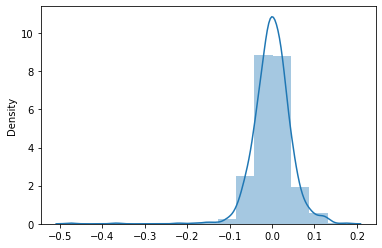

In [69]:
sns.distplot(res, bins=15)
plt.show()


In [70]:
# Lets test the model that we built to test data.

X_test = X_test.drop(val, axis=1)
X_test.shape

(439, 60)

In [71]:
X_test_sm = sm.add_constant(X_test)
y_pred = lm_model.predict(X_test_sm)
r_squared_test = round(r2_score(y_test, y_pred), 4)
print(r_squared_test)

0.8453


## Step 4 : Polynomial Regression

In [72]:
# Building a Polynomial model
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [73]:
# Train test split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=100)

In [74]:
# We will build a Polynomial model with degree 2. Degree 2 was found by trial and error method. We will use PolynomialFeatures
# function to Fit and transform the Training data. Then, we will fit that model to Linear regression model and get the model ready.

degree=2
polyreg = PolynomialFeatures(degree)
X_poly = polyreg.fit_transform(X_train)
linreg = LinearRegression()
linreg.fit(X_poly, y_train)

LinearRegression()

In [75]:
# Once the model is fit, we will then use predict to check the y value predicted. Then use r2_score function to check how accurate 
# has the model predicted the y value compared to actual y value.

y_pred_train = linreg.predict(polyreg.fit_transform(X_train))
print(r2_score(y_train, y_pred_train))

0.9999876001882452


In [76]:
# 0.9999875979242342 indication of over-fitting

In [77]:
# Metrics to assess model performance
rss = np.sum(np.square(y_train - y_pred_train))
print(rss)
mse = mean_squared_error(y_train, y_pred_train)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

0.00021050810754051147
2.0617836193977617e-07
0.00045406867535624626


## Step 5 : Ridge and Lasso Regression

In [78]:
# Ridge Regression

# We will use GridSearchCV to find the best/optimal Lamda/Alpha values for Ridge Regression.

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
print(model_cv.best_params_)

{'alpha': 0.9}


In [80]:
# the function has determined 0.9 as the optimal Lambda value
# Based on above value we build model using Ridge regression

In [81]:
# using Alpha as 0.9,we will build a Ridge Regression model for training data. 

alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=0.9)

In [82]:
# Now using Predict, we can predict the y_pred value for both training and test and check the R2_score.

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.9340361824674182
0.8752452923228209


In [83]:
#As we can see, We are getting an training R2_score of 0.934 and Testing R2_score of 0.875 from Ridge Regression

In [84]:
# Now we can check the Coefficients.

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model = list(zip(cols, model_parameters))
parameters = pd.DataFrame(model)
parameters.columns = ['Variable', 'Coeff']
parameters.sort_values(ascending=False, by='Coeff')

,Variable,Coeff
0,constant,0.319
10,GrLivArea,0.137
8,1stFlrSF,0.120
9,2ndFlrSF,0.090
82,OverallQual_Rating9,0.074
3,LotArea,0.069
16,MSZoning_RH,0.066
17,MSZoning_RL,0.065
15,MSZoning_FV,0.065
18,MSZoning_RM,0.060


In [85]:
#We can see that GrLivArea, 1stFlrSF and OverallQual_Rating9 are the top 3 positively affecting variables 

In [86]:
# Lasso Regression

# We will use GridSearchCV to find the best/optimal Lamda/Alpha values for Lasso Regression.

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)      
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# As we can see, the function has determined 0.9 as the optimal Lambda value. We will use the same to build a Lasso Regression Model.

print(model_cv.best_params_)

{'alpha': 0.0001}


In [88]:
# Building an Lasso Regression Model.

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [89]:
# Now using Predict, we can predict the y_pred value for both training and test and check the R2_score.

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9258762960565862
0.880205272307429


In [90]:
# As we can see, We are getting an training R2_score of 0.925 and Testing R2_score of 0.88 from Lasso Regression

In [91]:
# Now we can check the Coefficients.

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model = list(zip(cols, model_parameters))
parameters = pd.DataFrame(model)
parameters.columns = ['Variable', 'Coeff']
parameters.sort_values(ascending=False, by='Coeff')

,Variable,Coeff
10,GrLivArea,0.399
0,constant,0.309
82,OverallQual_Rating9,0.078
36,Neighborhood_Crawfor,0.048
90,OverallCond_Rating9,0.042
179,FullBath_Three Bath,0.041
81,OverallQual_Rating8,0.041
52,Neighborhood_StoneBr,0.038
16,MSZoning_RH,0.038
3,LotArea,0.037


In [92]:
# We can see that GrLivArea, Neighborhood_Crawfor and OverallQual_Rating9 are the top 3 positively affected

In [93]:
# Lets check how the Lasso, Ridge and Linear model are different to eachother.

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [94]:
betas

,Linear,Ridge,Lasso
MSSubClass,-5.983877e-02,-0.033147,-0.026283
LotFrontage,-2.887986e-02,-0.015539,-0.000000
LotArea,1.392585e-01,0.069156,0.037109
MasVnrArea,-1.609814e-02,-0.004672,-0.000000
BsmtFinSF1,-1.411192e-01,0.000931,0.000000
BsmtUnfSF,-4.764489e-02,0.009498,0.000000
TotalBsmtSF,1.037282e-01,0.039119,0.000000
1stFlrSF,1.386638e-01,0.120188,0.000000
2ndFlrSF,7.966501e-02,0.090041,0.006904
GrLivArea,2.814778e-01,0.137355,0.399293


In [ ]:
# As we can see, both Ridge and Lasso Model have similar/ near R2_Score for testing and training data. But we can select Lasso model as the better model as it not only gives a better testing R2_score, it also has feature selection due to which it removes(Makes Coeff value 0) insignificant columns and this leads to a simpler and less complex model which as we have is good then having a Overly complex model.